# Housing Price Prediction

## Import libraries

In [1]:
import os
import sys
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## read the dataset

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df.shape

(10000, 16)

In [4]:
df.columns

Index(['uid', 'city', 'description', 'homeType', 'latitude', 'longitude',
       'garageSpaces', 'hasSpa', 'yearBuilt', 'numOfPatioAndPorchFeatures',
       'lotSizeSqFt', 'avgSchoolRating', 'MedianStudentsPerTeacher',
       'numOfBathrooms', 'numOfBedrooms', 'priceRange'],
      dtype='object')

In [5]:
df.head()

,uid,city,description,homeType,latitude,longitude,garageSpaces,hasSpa,yearBuilt,numOfPatioAndPorchFeatures,lotSizeSqFt,avgSchoolRating,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,priceRange
0,1748,austin,MULTIPLE OFFERS submit best & final to Agent b...,Single Family,30.380089,-97.800621,0,False,1988,0,102366.0,7.000000,17,4.0,4,650000+
1,13380,austin,"4644 Hoffman Dr, Austin, TX 78749 is a single ...",Single Family,30.199486,-97.859947,0,False,1997,0,6534.0,6.666667,16,3.0,4,350000-450000
2,4115,austin,"6804 Canal St, Austin, TX 78741 is a single fa...",Single Family,30.227398,-97.696083,0,False,1952,0,5619.0,3.333333,11,1.0,2,0-250000
3,6926,austin,Beautiful large lot with established trees. Lo...,Single Family,30.205469,-97.792351,4,False,1976,0,6416.0,4.000000,14,2.0,4,0-250000
4,14480,austin,Stunning NW Hills designer remodel by Cedar an...,Single Family,30.345106,-97.767426,2,False,1984,0,10759.0,7.000000,16,3.0,5,650000+


## Exploratory Analysis

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
uid,10000.0,7626.621900,4380.486852,1.000000,3838.750000,7603.500000,11435.750000,1.517000e+04
latitude,10000.0,30.291191,0.097075,30.085030,30.202516,30.283664,30.366375,3.051732e+01
longitude,10000.0,-97.778476,0.084543,-98.020477,-97.838594,-97.769680,-97.718313,-9.757063e+01
garageSpaces,10000.0,1.229600,1.328179,0.000000,0.000000,1.000000,2.000000,2.200000e+01
yearBuilt,10000.0,1988.570400,21.515272,1905.000000,1975.000000,1993.000000,2006.000000,2.020000e+03
numOfPatioAndPorchFeatures,10000.0,0.667200,0.986378,0.000000,0.000000,0.000000,1.000000,8.000000e+00
lotSizeSqFt,10000.0,20710.283980,448833.815153,100.000000,6534.000000,8189.000000,10890.000000,3.415452e+07
avgSchoolRating,10000.0,5.766236,1.861940,2.333333,4.000000,5.666667,7.000000,9.500000e+00
MedianStudentsPerTeacher,10000.0,14.857700,1.748473,10.000000,14.000000,15.000000,16.000000,1.900000e+01
numOfBathrooms,10000.0,2.692100,0.979206,1.000000,2.000000,3.000000,3.000000,1.000000e+01


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   uid                         10000 non-null  int64  
 1   city                        10000 non-null  object 
 2   description                 9999 non-null   object 
 3   homeType                    10000 non-null  object 
 4   latitude                    10000 non-null  float64
 5   longitude                   10000 non-null  float64
 6   garageSpaces                10000 non-null  int64  
 7   hasSpa                      10000 non-null  bool   
 8   yearBuilt                   10000 non-null  int64  
 9   numOfPatioAndPorchFeatures  10000 non-null  int64  
 10  lotSizeSqFt                 10000 non-null  float64
 11  avgSchoolRating             10000 non-null  float64
 12  MedianStudentsPerTeacher    10000 non-null  int64  
 13  numOfBathrooms              1000

### Target variable

In [8]:
df['priceRange'].value_counts()

priceRange
250000-350000    2356
350000-450000    2301
450000-650000    2275
650000+          1819
0-250000         1249
Name: count, dtype: int64

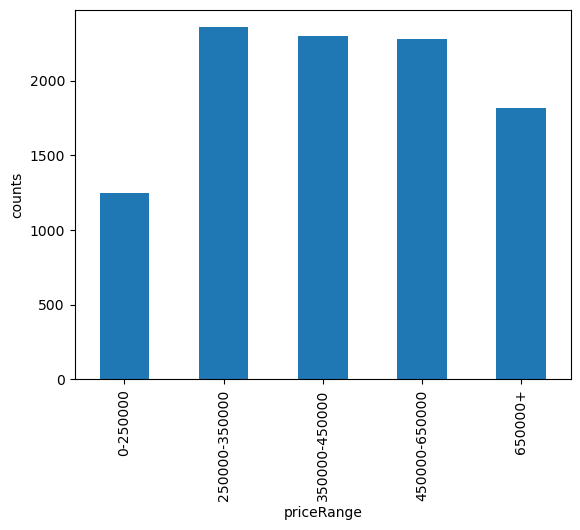

In [9]:
df['priceRange'].value_counts().sort_index().plot.bar()
plt.ylabel('counts');

In [10]:
price_mapping = {'0-250000':200000, '250000-350000':300000, '350000-450000':400000, '450000-650000':550000, '650000+':650000}
df['price'] = df['priceRange'].map(price_mapping)

In [11]:
df['price'].value_counts()

price
300000    2356
400000    2301
550000    2275
650000    1819
200000    1249
Name: count, dtype: int64

## Explore other features

In [12]:
df.columns

Index(['uid', 'city', 'description', 'homeType', 'latitude', 'longitude',
       'garageSpaces', 'hasSpa', 'yearBuilt', 'numOfPatioAndPorchFeatures',
       'lotSizeSqFt', 'avgSchoolRating', 'MedianStudentsPerTeacher',
       'numOfBathrooms', 'numOfBedrooms', 'priceRange', 'price'],
      dtype='object')

In [13]:
df['uid'].nunique() # just unique for each row, we can ignore this

10000

In [14]:
df['description'][0] # description, ignore this

'MULTIPLE OFFERS submit best & final to Agent by Mon 21st - 5pm. Appt with Agent.  RARE PANORAMIC VIEW LOT IN JESTER ESTATES SEE FOR MILES!!  Home sits on Cul-de-sac & backs to a Preserve.  Stunning remodeled Kitchen & Bathrooms. Master suite is a private sanctuary with chic master bath, huge bedroom, walk-in closet & private deck.  Jester has a pool, park, tennis courts & feeds into Anderson High.  This home has been well loved & features 3 living areas, an office, & 3 car garage.'

#### latitude, longitude we can ignore
yearBuilt is given, but we don't know when the house was sold... so age of the house is not known... we can ignore this

In [15]:
discrete_columns = ['city', 'homeType', 'garageSpaces', 'hasSpa', 'numOfPatioAndPorchFeatures', 'avgSchoolRating', 'MedianStudentsPerTeacher', 'numOfBathrooms', 'numOfBedrooms']

## plot the discrete columns

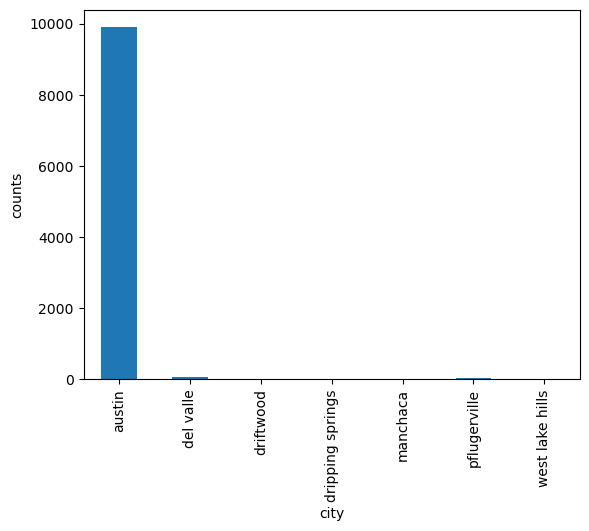

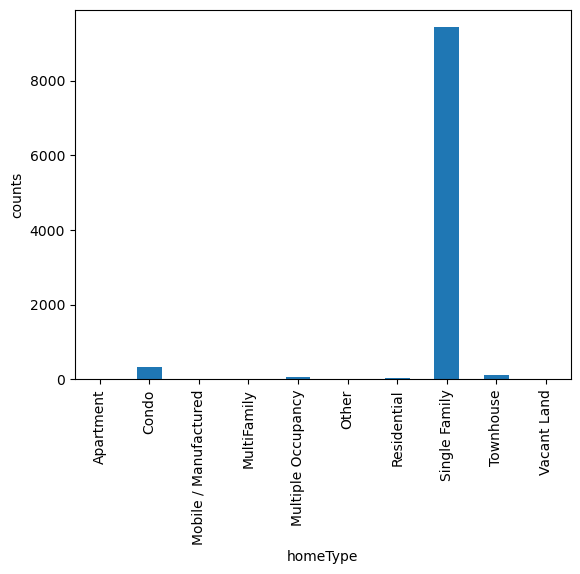

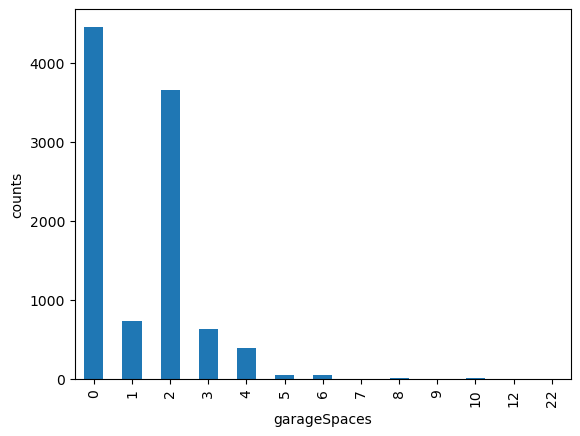

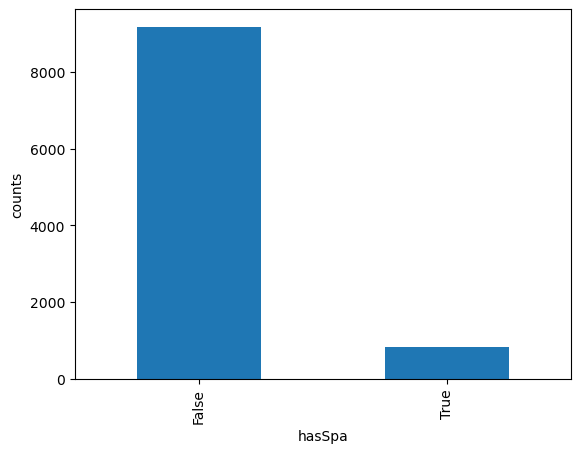

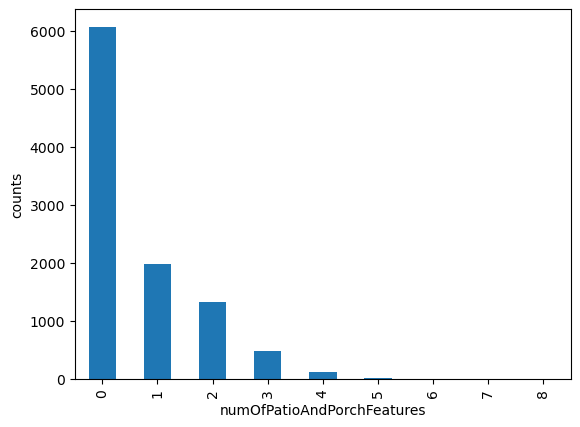

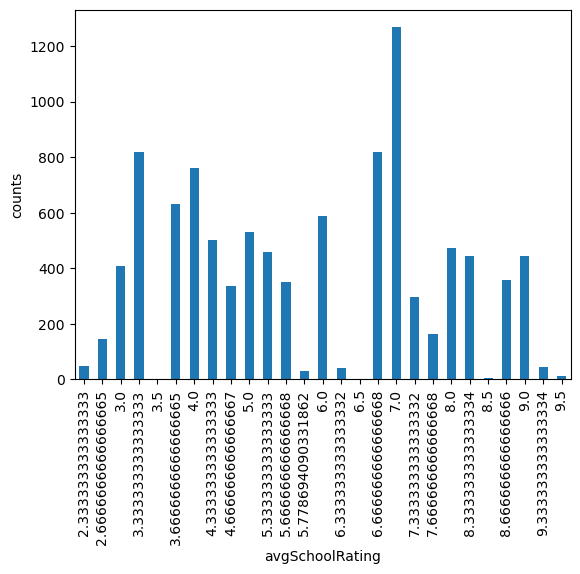

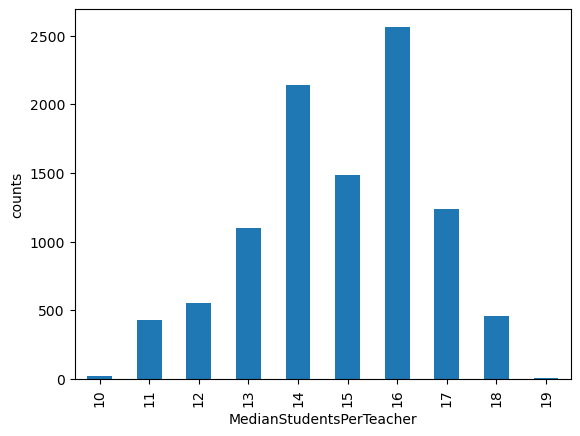

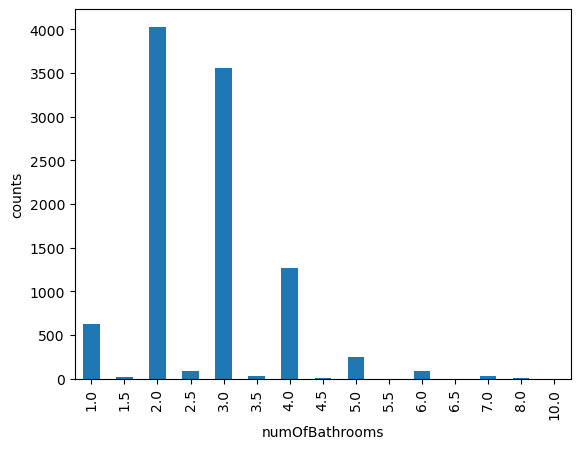

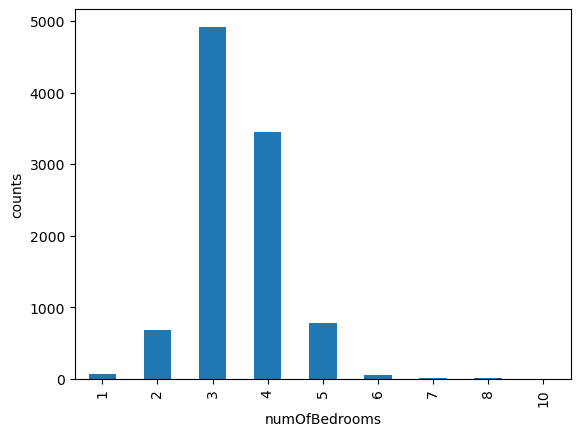

In [16]:
for c in discrete_columns:
    df[c].value_counts().sort_index().plot.bar();
    plt.ylabel('counts');
    plt.show()

## Median of the target feature with discrete columns

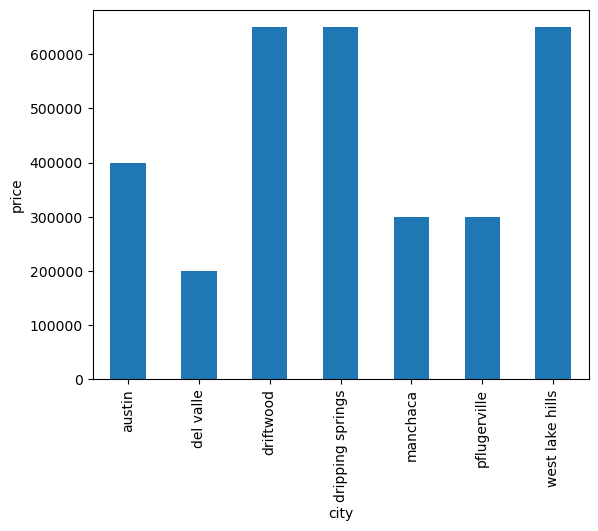

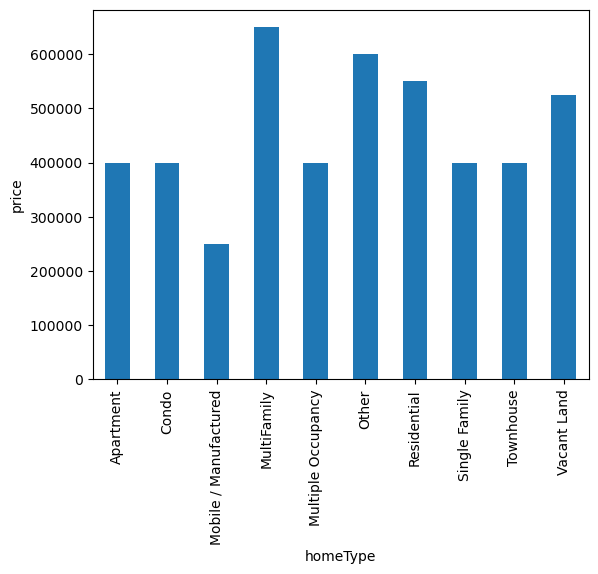

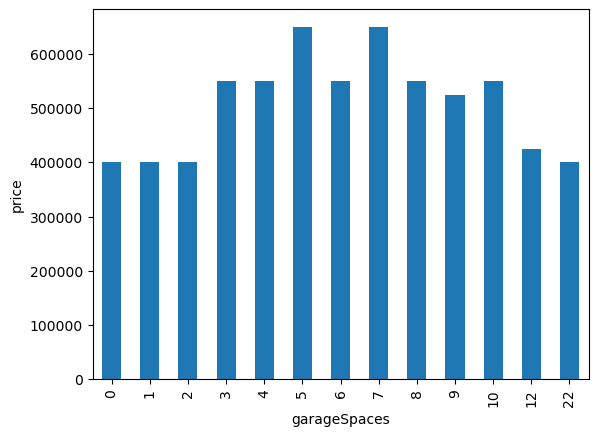

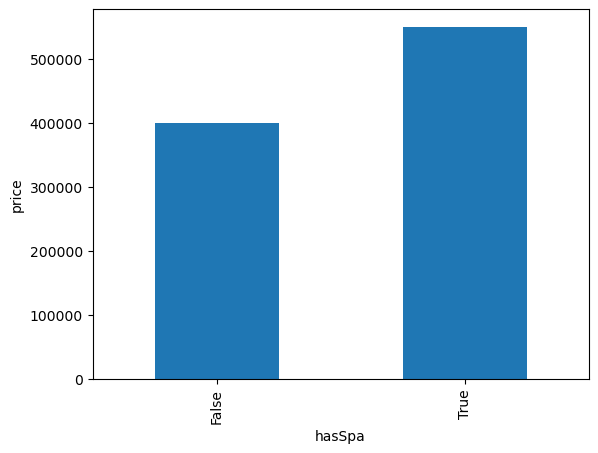

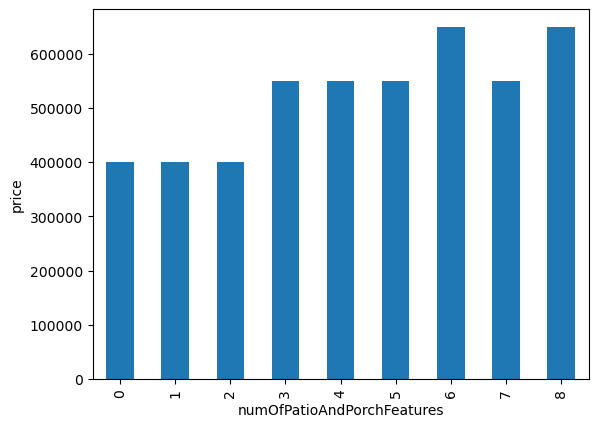

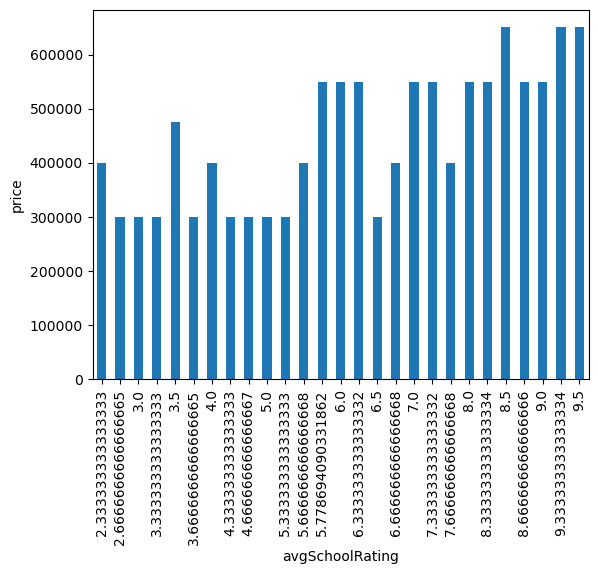

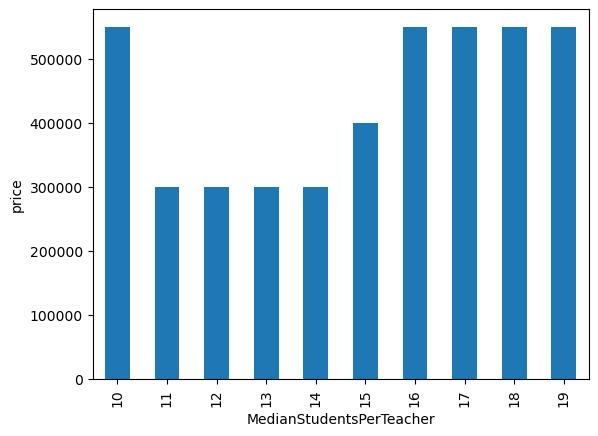

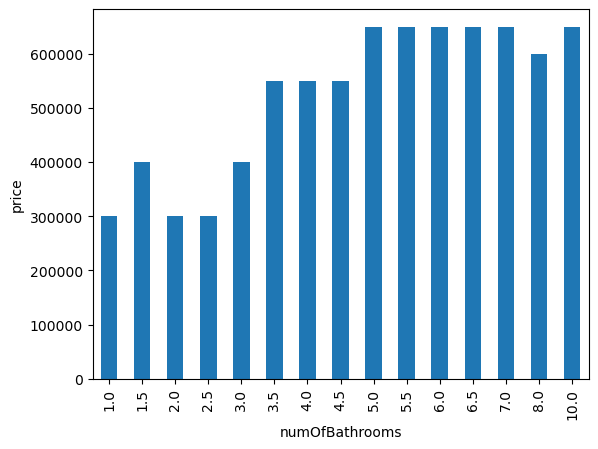

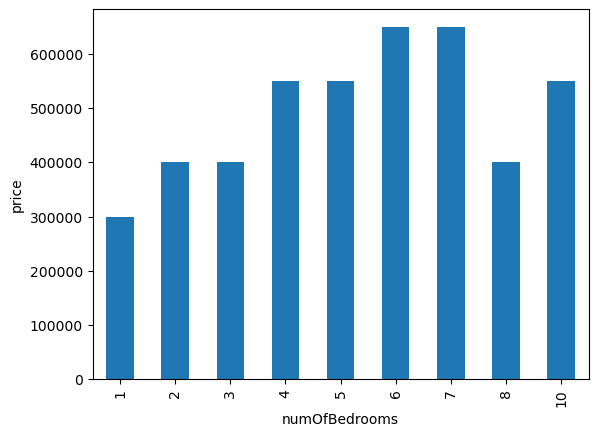

In [17]:
for c in discrete_columns:
    df.groupby(c)['price'].median().plot.bar()
    plt.ylabel('price')
    plt.show()

## plot numeric columns

In [18]:
num_cols = ['latitude', 'longitude', 'yearBuilt', 'lotSizeSqFt']

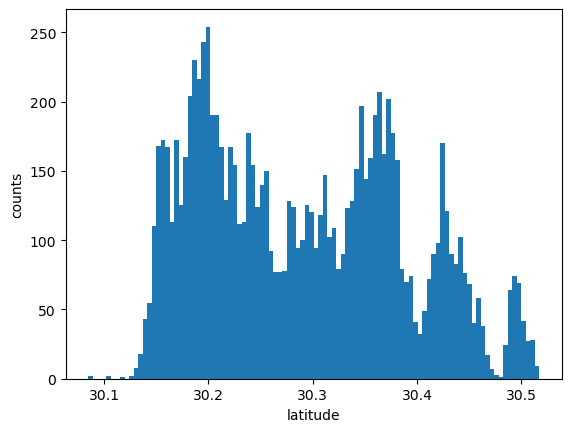

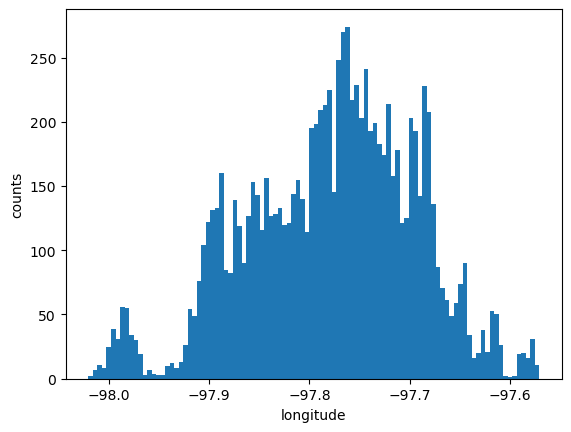

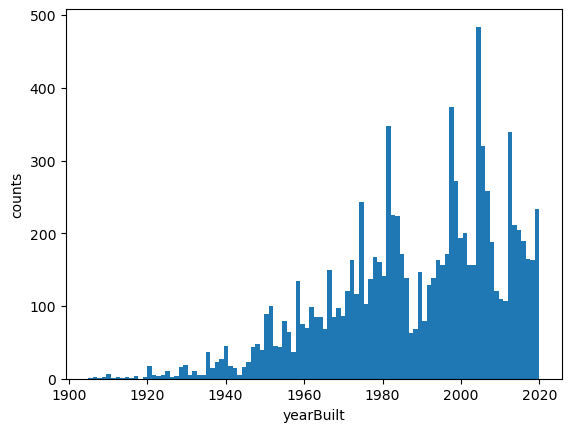

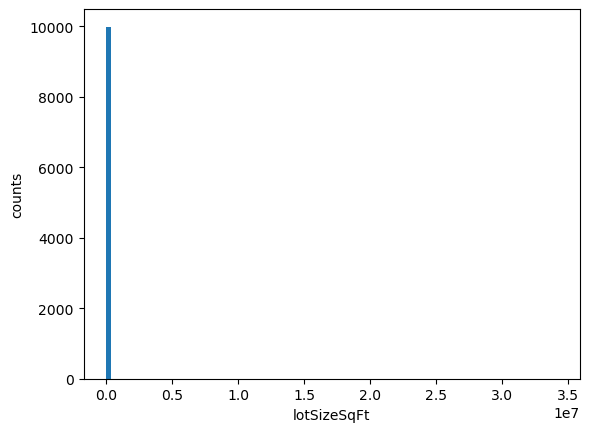

In [19]:
for c in num_cols:
    df[c].plot.hist(bins=100);
    plt.xlabel(c)
    plt.ylabel('counts');
    plt.show();

### lotSizeSqFt looks like outlier is present

## scatter plot of target feature with numeric columns

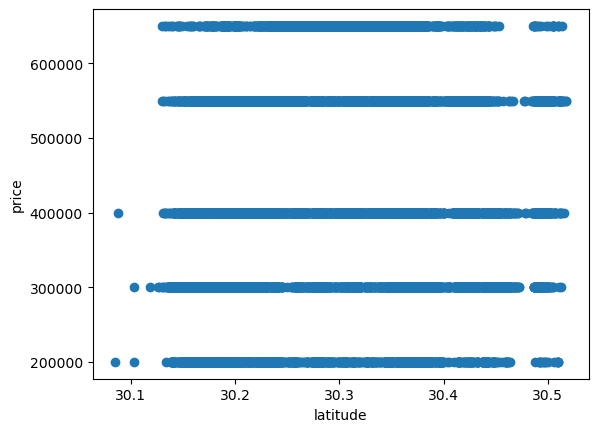

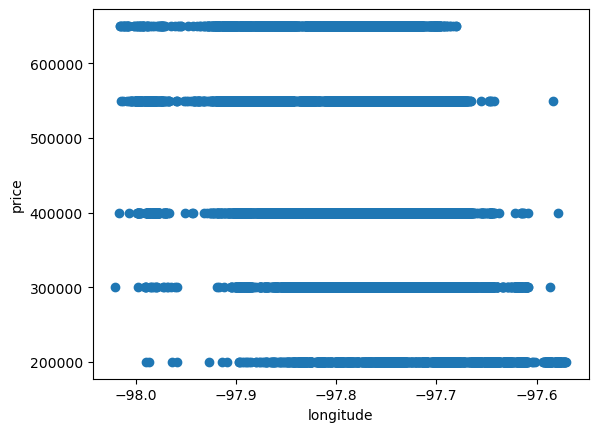

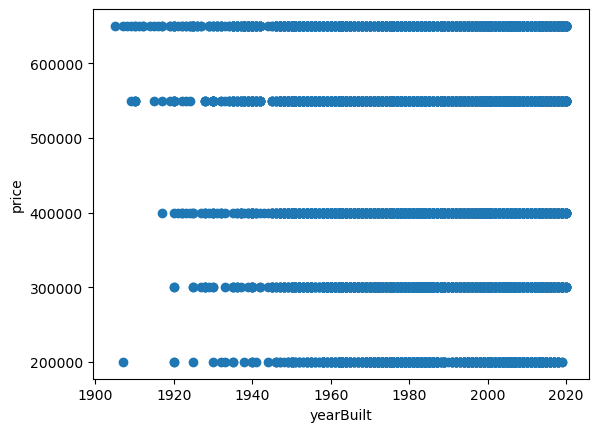

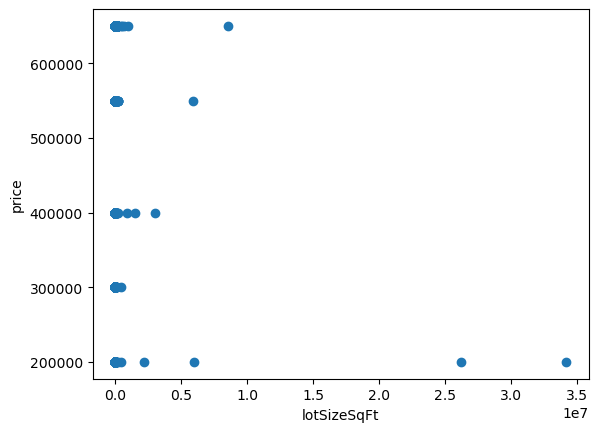

In [20]:
for c in num_cols:
    plt.scatter(df[c], df['price'])
    plt.xlabel(c)
    plt.ylabel('price')
    plt.show();

### looks like 2 outlier rows are present in lotSizeSqFt

In [21]:
df.head()

,uid,city,description,homeType,latitude,longitude,garageSpaces,hasSpa,yearBuilt,numOfPatioAndPorchFeatures,lotSizeSqFt,avgSchoolRating,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,priceRange,price
0,1748,austin,MULTIPLE OFFERS submit best & final to Agent b...,Single Family,30.380089,-97.800621,0,False,1988,0,102366.0,7.000000,17,4.0,4,650000+,650000
1,13380,austin,"4644 Hoffman Dr, Austin, TX 78749 is a single ...",Single Family,30.199486,-97.859947,0,False,1997,0,6534.0,6.666667,16,3.0,4,350000-450000,400000
2,4115,austin,"6804 Canal St, Austin, TX 78741 is a single fa...",Single Family,30.227398,-97.696083,0,False,1952,0,5619.0,3.333333,11,1.0,2,0-250000,200000
3,6926,austin,Beautiful large lot with established trees. Lo...,Single Family,30.205469,-97.792351,4,False,1976,0,6416.0,4.000000,14,2.0,4,0-250000,200000
4,14480,austin,Stunning NW Hills designer remodel by Cedar an...,Single Family,30.345106,-97.767426,2,False,1984,0,10759.0,7.000000,16,3.0,5,650000+,650000


## Encoding of categorical data

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()
df['homeType1'] = le.fit_transform(df['homeType'])
df['city1'] = le.fit_transform(df['city'])

In [24]:
df['hasSpa1'] = np.where(df['hasSpa']==True, 1, 0)

In [25]:
df.columns

Index(['uid', 'city', 'description', 'homeType', 'latitude', 'longitude',
       'garageSpaces', 'hasSpa', 'yearBuilt', 'numOfPatioAndPorchFeatures',
       'lotSizeSqFt', 'avgSchoolRating', 'MedianStudentsPerTeacher',
       'numOfBathrooms', 'numOfBedrooms', 'priceRange', 'price', 'homeType1',
       'city1', 'hasSpa1'],
      dtype='object')

### Select columns for Model building

In [26]:
cols_selected = ['city1', 'homeType1',
       'garageSpaces', 'hasSpa1', 'numOfPatioAndPorchFeatures',
       'lotSizeSqFt', 'avgSchoolRating', 'MedianStudentsPerTeacher',
       'numOfBathrooms', 'numOfBedrooms', 'price']

In [27]:
df_final = df[cols_selected]

In [28]:
df_final.head()

,city1,homeType1,garageSpaces,hasSpa1,numOfPatioAndPorchFeatures,lotSizeSqFt,avgSchoolRating,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,price
0,0,7,0,0,0,102366.0,7.000000,17,4.0,4,650000
1,0,7,0,0,0,6534.0,6.666667,16,3.0,4,400000
2,0,7,0,0,0,5619.0,3.333333,11,1.0,2,200000
3,0,7,4,0,0,6416.0,4.000000,14,2.0,4,200000
4,0,7,2,0,0,10759.0,7.000000,16,3.0,5,650000


In [29]:
df_final.shape

(10000, 11)

## Model Training, 70-30 splitting

In [30]:
# train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score 

In [31]:
X = df_final.drop(['price'], axis=1)
y = df_final['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### We will train the following 5 models
```
Linear Regression
RandomForestRegressor
XGBoost
CatBoost
LightGBM
```

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

### Train each model and test on testing dataset
define the model

In [33]:
lr_model = LinearRegression()
rf_model = RandomForestRegressor(random_state=42)
xgb_model = XGBRegressor(random_state=42, verbosity=0)
catboost_model = CatBoostRegressor(random_state=42, verbose=0)
lgbm_model = LGBMRegressor(random_state=42)

In [34]:
def get_r2_score(model):
    model.fit(X_train, y_train)
    score = r2_score(y_test, model.predict(X_test))
    return score

In [35]:
models = [lr_model, rf_model, xgb_model, catboost_model, lgbm_model]

In [36]:
get_r2_score(lr_model)

0.34710096072237406

In [37]:
for m in models:
    print(m.__class__.__name__, get_r2_score(m))

LinearRegression 0.34710096072237406
RandomForestRegressor 0.520792585464015
XGBRegressor 0.562773568818471
CatBoostRegressor 0.5885209209544395
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001141 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 350
[LightGBM] [Info] Number of data points in the train set: 7000, number of used features: 10
[LightGBM] [Info] Start training from score 432292.857143
LGBMRegressor 0.5782410554310787


## CatBoost gives highest r2 sore of 0.59

## Model export and testing on new data

In [38]:
import pickle

In [39]:
pickle.dump(catboost_model, open("catboost_model.pkl", 'wb'))

In [40]:
loaded_model = pickle.load(open("catboost_model.pkl", 'rb'))

In [41]:
r2_score(y_test, loaded_model.predict(X_test))

0.5885209209544395

### convert the prediction to pricerange

In [42]:
loaded_model.predict(X_test[0:10])

array([467372.61893119, 237116.37825322, 590807.80701553, 295570.20695867,
       312273.94296899, 314610.70583077, 452841.20991105, 528704.36486343,
       628707.83979896, 350739.03692643])

In [43]:
def create_mapping(y):
    conditions = [
        (y>0) & (y<=250000),
        (y>250000) & (y<=350000),
        (y>350000) & (y<=450000),
        (y>450000) & (y<=650000),
        (y>650000)
    ]
    values = ['0-250000', '250000-350000',  '350000-450000', '450000-650000', '650000+']
    y_out = np.select(conditions, values)
    return y_out

In [44]:
pickle.dump(create_mapping, open("mapping.pkl", 'wb'))
mapping = pickle.load(open("mapping.pkl", 'rb'))

In [45]:
loaded_model.predict(X_test[0:10])

array([467372.61893119, 237116.37825322, 590807.80701553, 295570.20695867,
       312273.94296899, 314610.70583077, 452841.20991105, 528704.36486343,
       628707.83979896, 350739.03692643])

In [46]:
mapping(loaded_model.predict(X_test[0:10]))

array(['450000-650000', '0-250000', '450000-650000', '250000-350000',
       '250000-350000', '250000-350000', '450000-650000', '450000-650000',
       '450000-650000', '350000-450000'], dtype='<U13')